<a href="https://colab.research.google.com/github/Hrtsh-Ynkzn/SAMURAI/blob/main/Study/EC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ECサイト（オンラインストア）の購買データ

https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset

# データダウンロード
https://take-tech-engineer.com/kaggle-colab-api/

In [ ]:
# KaggleのAPI(Application Programming Interface)を利用するためのインストール
!pip install kaggle

In [ ]:
# Googleドライブをマウント（連携）する
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# KaggleのAPIを利用するための設定
# 初回のみJSONファイルをダウンロードして、Google Driveに保存する必要がある

import os
import json
f = open("/content/drive/MyDrive/kaggle.json", 'r')
json_data = json.load(f)
os.environ['KAGGLE_USERNAME'] = json_data['username']
os.environ['KAGGLE_KEY'] = json_data['key']

# データ準備

In [ ]:
# 標準ライブラリ
import pandas as pd
import numpy as np

In [ ]:
# Kaggleの各コンペページから、APIコマンドを取得し実施
!kaggle datasets download -d ulrikthygepedersen/online-retail-dataset

online-retail-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip <ダウンロードしたZIPファイル>
!unzip '/content/drive/MyDrive/archive.zip'

Archive:  /content/drive/MyDrive/archive.zip
replace online_retail.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# 解凍したZIPには、CSVファイルが含まれている。CSVファイルを読み込んで、Pandasデータフレーム化する
df = pd.read_csv('/content/online_retail.csv')   # ディレクトリに注意

# 確認用に出力
df.head()
# InvoiceNo:請求書番号
# StockCode:ここでは製品番号のこと
# Dscription:ここでは製品名のこと
# Quantity:量、個数
# InvoiceDate:購入日時
# UnitPrice:単価
# CustomerID:顧客ID
# Country:顧客の居住している国

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# カラムごとの基準統計量
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# カラムごとの欠損値数
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# nullの数を直接カウントする方法もある
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Python内でSQLを用いる
!pip install duckdb-engine

In [ ]:
# SQLを使えるようにするためのライブラリのインポート
import duckdb

In [ ]:
# 購買データ用処理
df_output = duckdb.query(
            f"""                    -- この一行を必ず入れて入力
            SELECT *                -- ここに必要な処理を書く
            FROM df                 -- テーブルには、Pandasのデータフレームを利用
            WHERE UnitPrice >= 0    -- マイナス値は除外
            AND
            Quantity >= 0           -- マイナス値は除外
            """
            ).to_df()

df_output.describe()

,Quantity,UnitPrice,CustomerID
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


# データ可視化

下記データ可視化の処理が短時間で完了しない場合に使用。最初の10000件のみ
```
df_sample = df.head(10000)
```

In [ ]:
# データ見える化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 試しに購入金額(PurchaseAmount)を新しい列として格納
df_output['PurchaseAmount'] = df_output['UnitPrice'] * df_output['Quantity']

df_output.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchaseAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


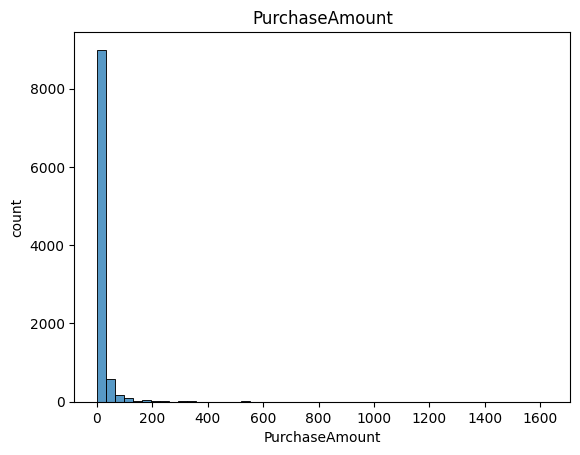

In [ ]:
# ヒストグラム
# レコードごとの購入金額（UnitPrice * Quantity)をX軸に描写

# 最初の10000個で試す
df_output_sample = df_output.head(10000)

# 描画プロット(fig)とサブプロット(ax)を生成
fig, ax = plt.subplots()

# ヒストグラムを描画
ax = sns.histplot(data = df_output_sample['PurchaseAmount'],
                  bins = 50,         # ビンの個数を調整
                  )

# X軸にラベルを設定
ax.set_xlabel("PurchaseAmount")

# Y軸にラベルを設定
ax.set_ylabel("count")

# タイトルを設定
ax.set_title("PurchaseAmount")

# ヒストグラムを表示
plt.show()

In [ ]:
# 国ごとの総購入金額のデータフレーム(df_EachCountry_total)に加工する
df_EachCountry_total = duckdb.query(
                       f"""
                       SELECT Country,
                       SUM(PurchaseAmount)
                       FROM df_output
                       GROUP BY Country
                       ORDER BY SUM(PurchaseAmount) DESC
                       """
                       ).to_df()

df_EachCountry_total.head()

,Country,sum(PurchaseAmount)
0,United Kingdom,9.025222e+06
1,Netherlands,2.854463e+05
2,EIRE,2.834540e+05
3,Germany,2.288671e+05
4,France,2.097151e+05


In [ ]:
# 基本統計量を確認
df_EachCountry_total.describe()

,sum(PurchaseAmount)
count,3.800000e+01
mean,2.807022e+05
std,1.458940e+06
min,1.459200e+02
25%,2.939290e+03
50%,1.464109e+04
75%,3.813784e+04
max,9.025222e+06


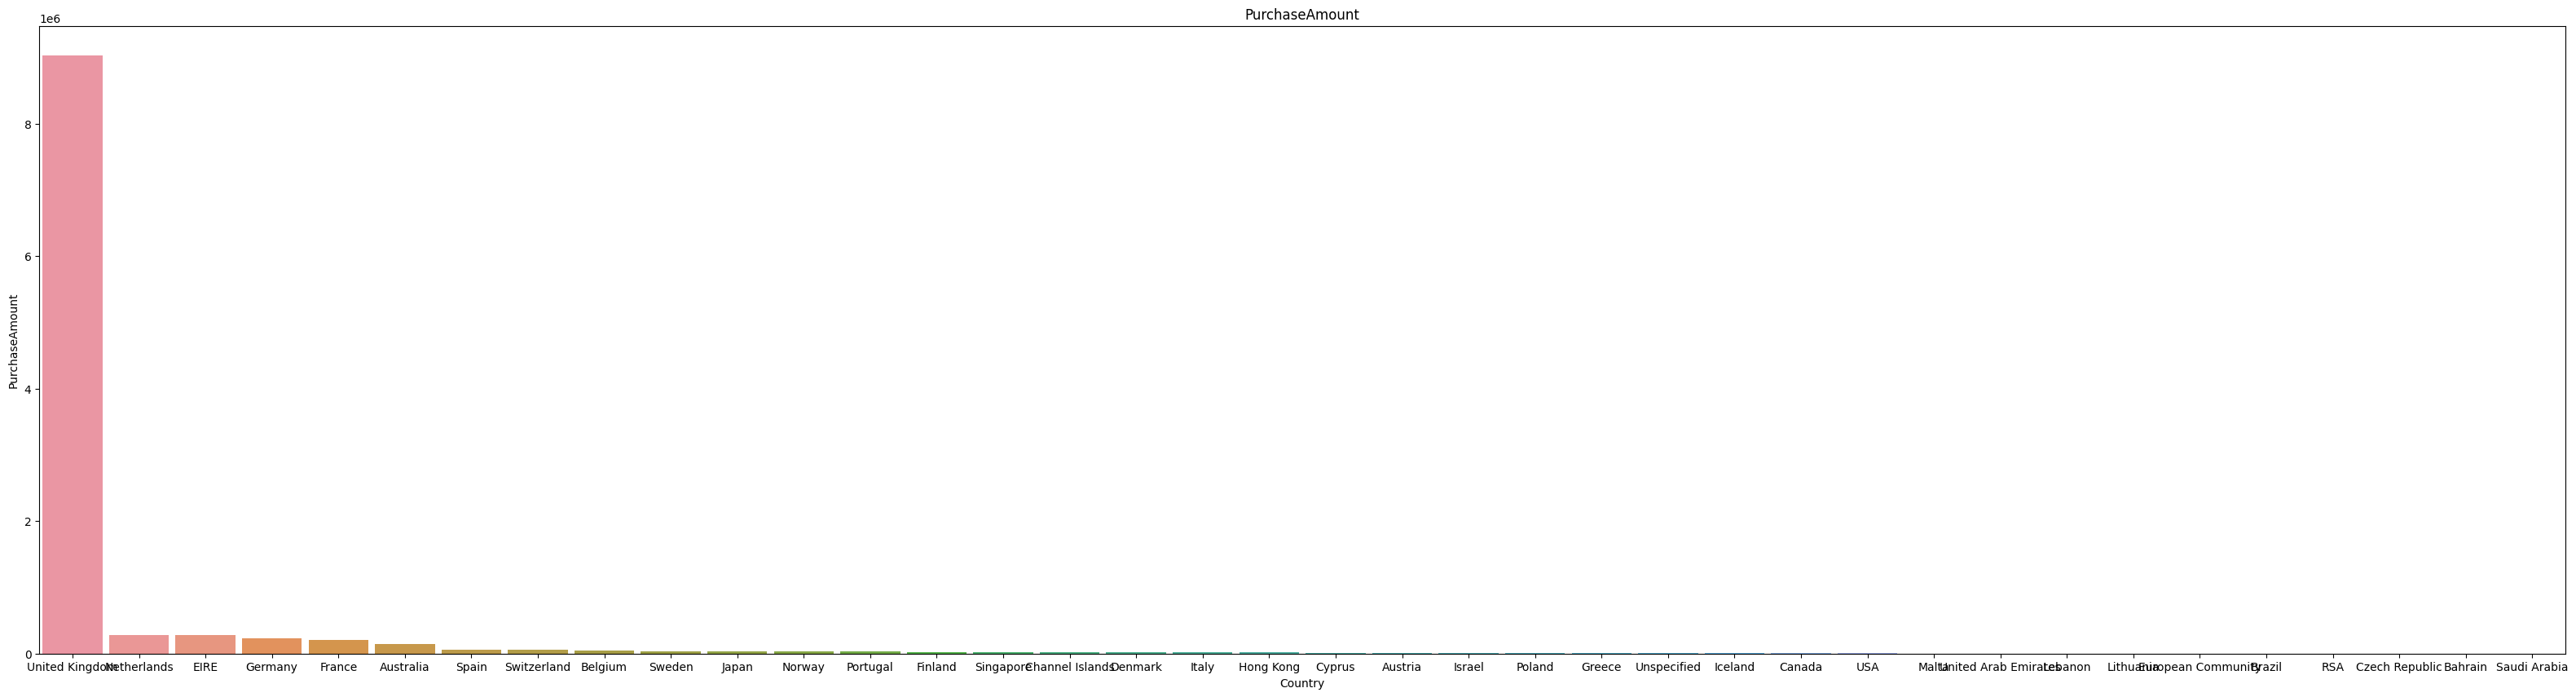

In [ ]:
# 棒グラフ
# 国ごとをX軸、総購入金額をY軸に描写

# 描画プロット(fig)とサブプロット(ax)を生成
fig, ax = plt.subplots(figsize = (40, 10))

ax = sns.barplot(
    data = df_EachCountry_total,
    x = 'Country',
    y = 'sum(PurchaseAmount)',
    width = 0.9
    )

# X軸にラベルを設定
ax.set_xlabel("Country")

# Y軸にラベルを設定
ax.set_ylabel("PurchaseAmount")

# タイトルを設定
ax.set_title("PurchaseAmount")

# 棒グラフを表示
plt.show()

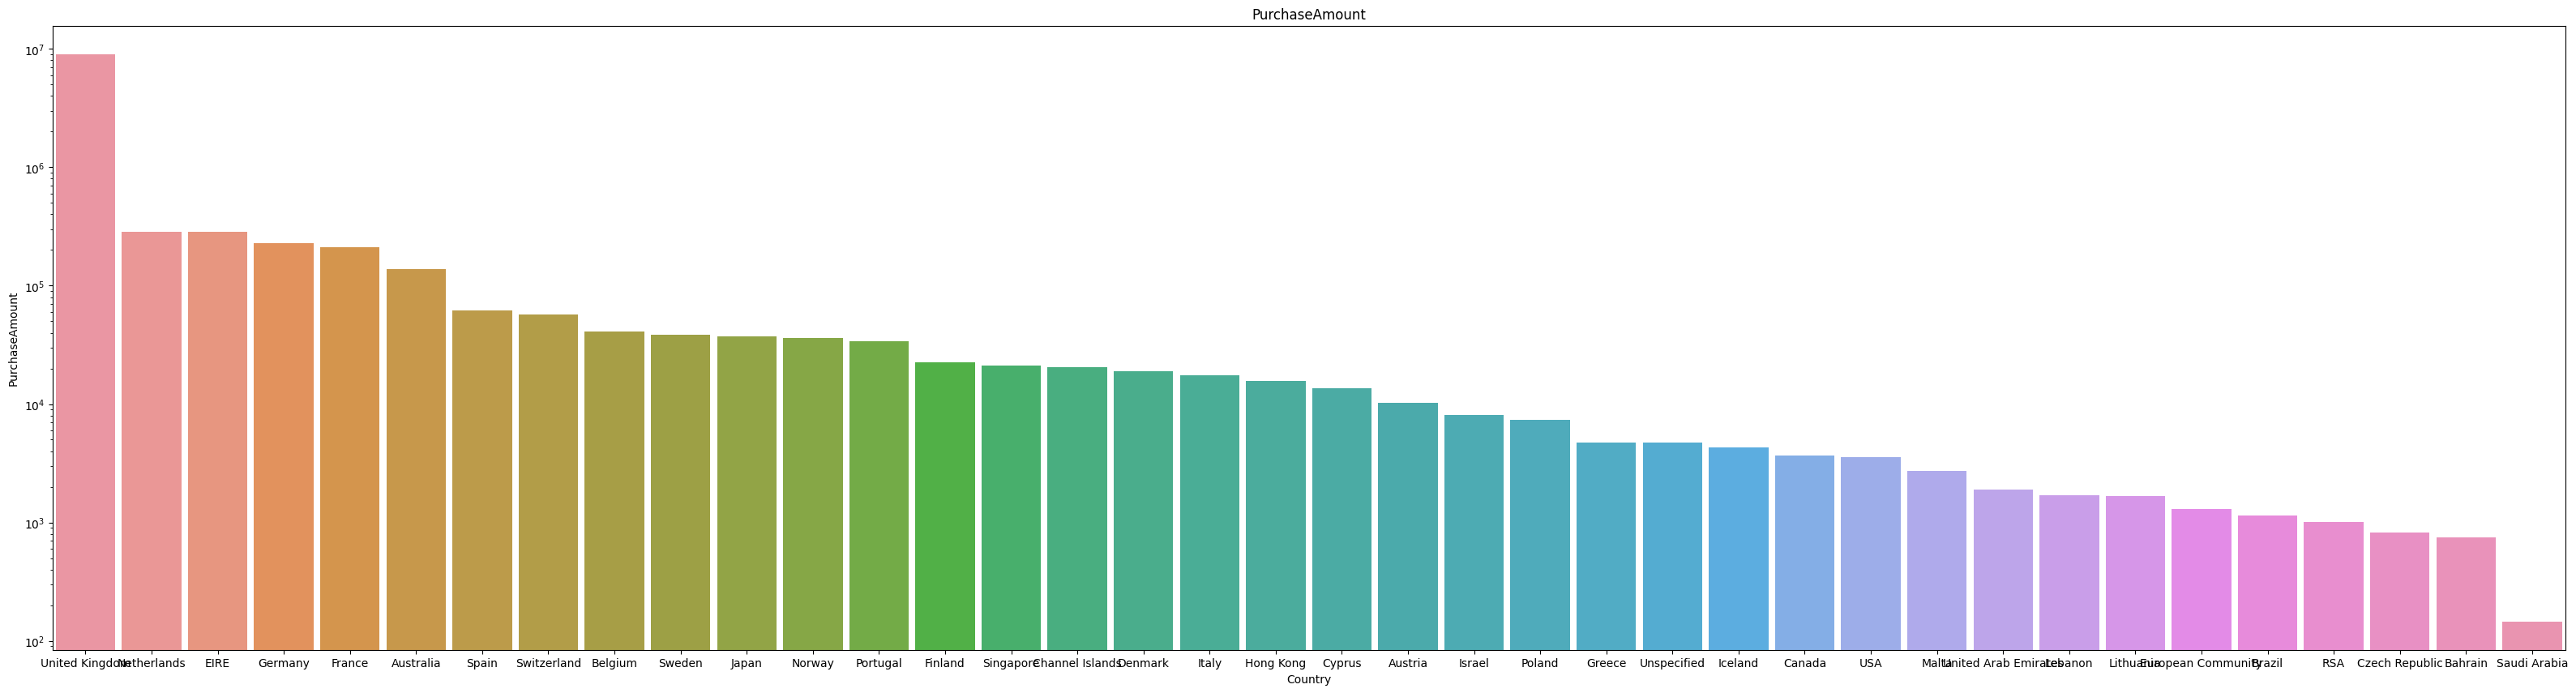

In [ ]:
# 棒グラフ　※y軸を対数に変換
# 国ごとをX軸、総購入金額をY軸に描写

# 描画プロット(fig)とサブプロット(ax)を生成
fig, ax = plt.subplots(figsize = (40, 10))

ax = sns.barplot(
    data = df_EachCountry_total,
    x = 'Country',
    y = 'sum(PurchaseAmount)',
    width = 0.9
    )

plt.yscale('log')

# X軸にラベルを設定
ax.set_xlabel("Country")

# Y軸にラベルを設定
ax.set_ylabel("PurchaseAmount")

# タイトルを設定
ax.set_title("PurchaseAmount")

# 棒グラフを表示
plt.show()

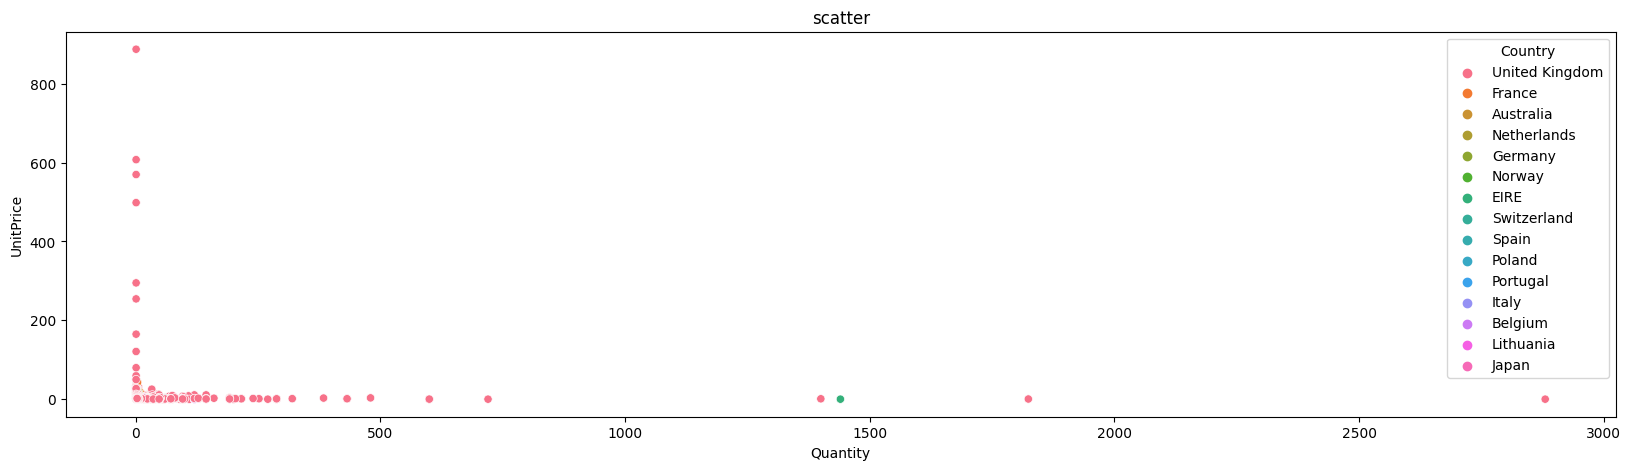

In [ ]:
# 散布図
# 個数をX軸、単価をY軸に設定、ポイントの色を国で分けて描写

# 描画プロット(fig)とサブプロット(ax)を生成
fig, ax = plt.subplots(figsize = (20, 5))

ax = sns.scatterplot(
    data = df_output_sample,
    x = 'Quantity',
    y = 'UnitPrice',
    hue = 'Country'
    )

# X軸にラベルを設定
ax.set_xlabel("Quantity")

# Y軸にラベルを設定
ax.set_ylabel("UnitPrice")

# タイトルを設定
ax.set_title("scatter")

# 散布図を表示
plt.show()

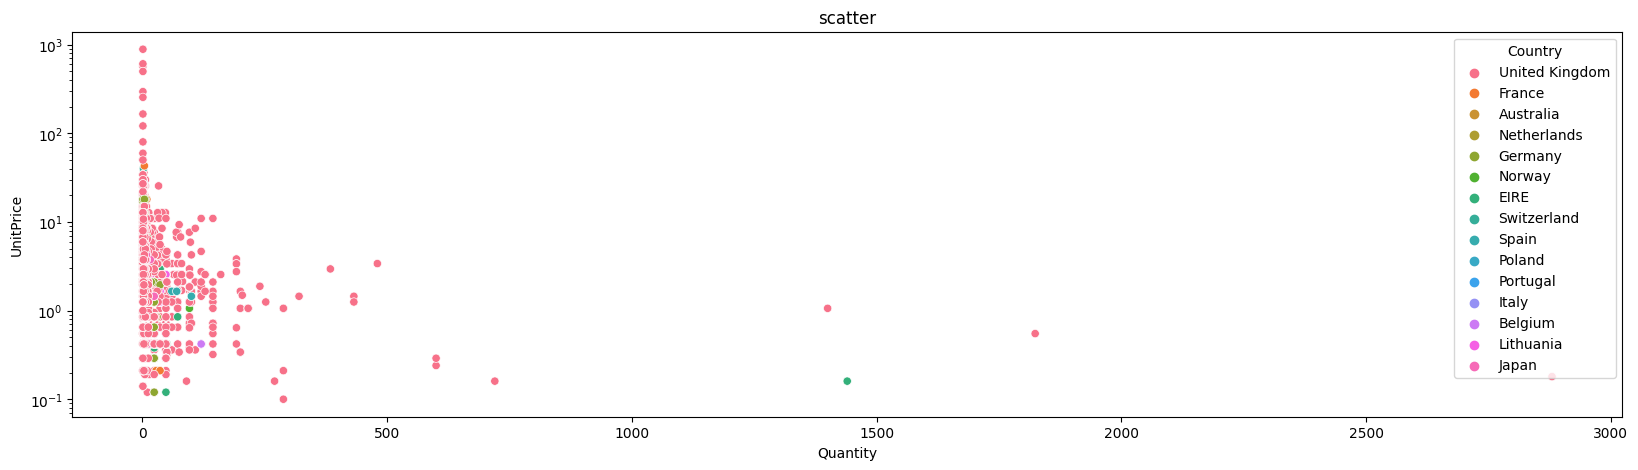

In [ ]:
# 散布図※y軸を対数に変換
# 個数をX軸、単価をY軸に設定、ポイントの色を国で分けて描写

# 描画プロット(fig)とサブプロット(ax)を生成
fig, ax = plt.subplots(figsize = (20, 5))

ax = sns.scatterplot(
    data = df_output_sample,
    x = 'Quantity',
    y = 'UnitPrice',
    hue = 'Country'
    )

# y軸を対数表示
plt.yscale('log')

# X軸にラベルを設定
ax.set_xlabel("Quantity")

# Y軸にラベルを設定
ax.set_ylabel("UnitPrice")

# タイトルを設定
ax.set_title("scatter")

# 散布図を表示
plt.show()

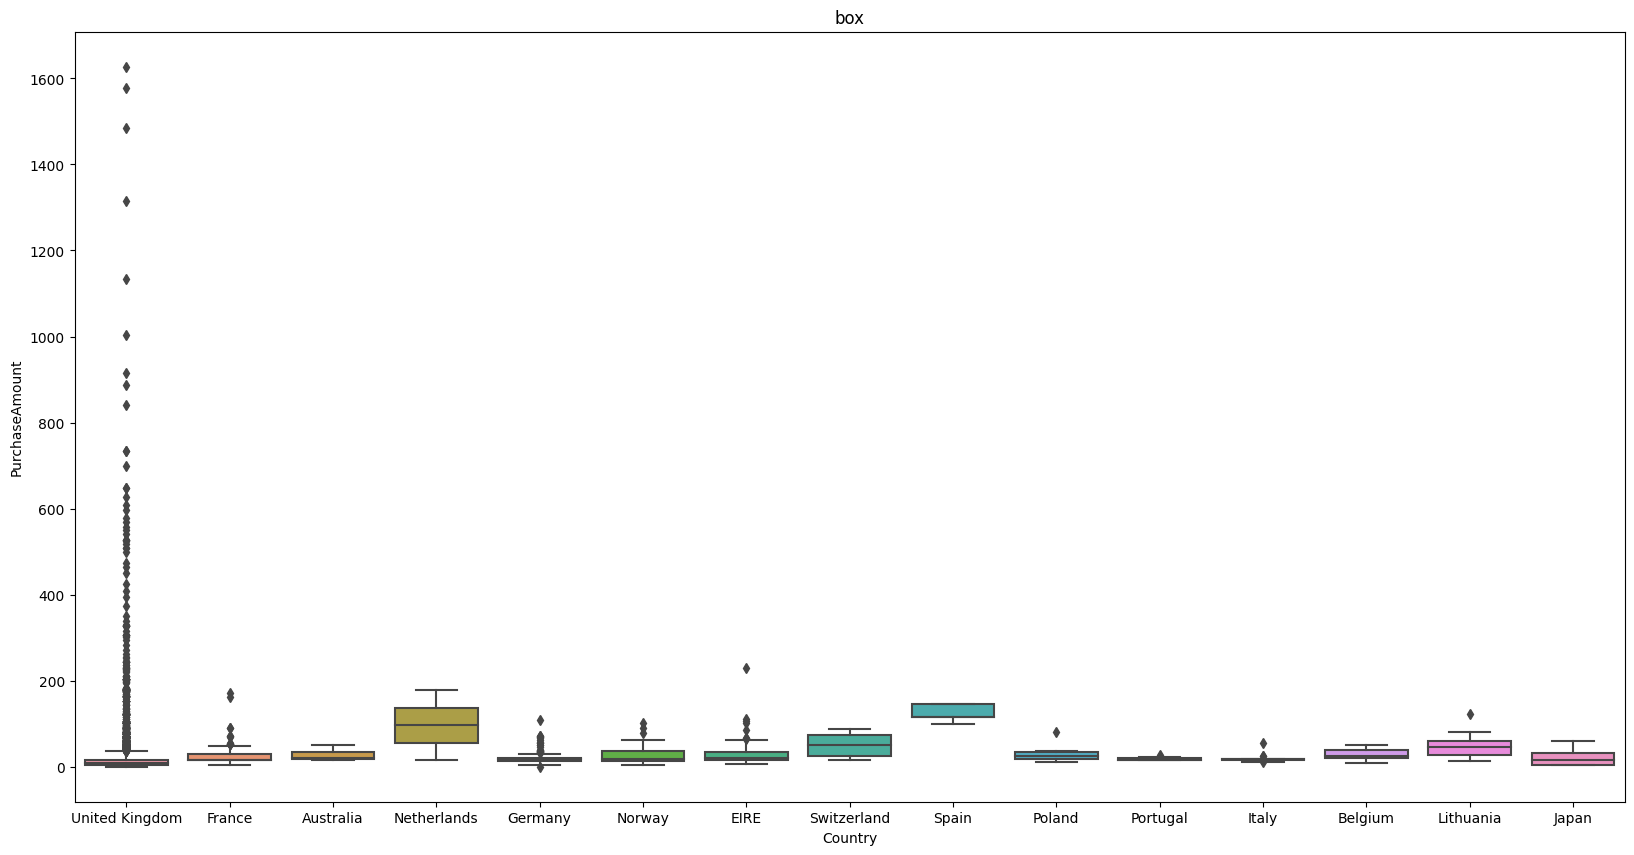

In [ ]:
# 箱ひげ図
# 国ごとをX軸、総購入金額をY軸に描写

# 描画プロット(fig)とサブプロット(ax)を生成
fig, ax = plt.subplots(figsize = (20, 10))   # グラフサイズを(20, 10)に変更した

ax = sns.boxplot(
    data = df_output_sample,
    x = 'Country',
    y = 'PurchaseAmount',
    )

# X軸にラベルを設定
ax.set_xlabel("Country")

# Y軸にラベルを設定
ax.set_ylabel("PurchaseAmount")

# タイトルを設定
ax.set_title("box")

# 箱ひげ図表示
plt.show()

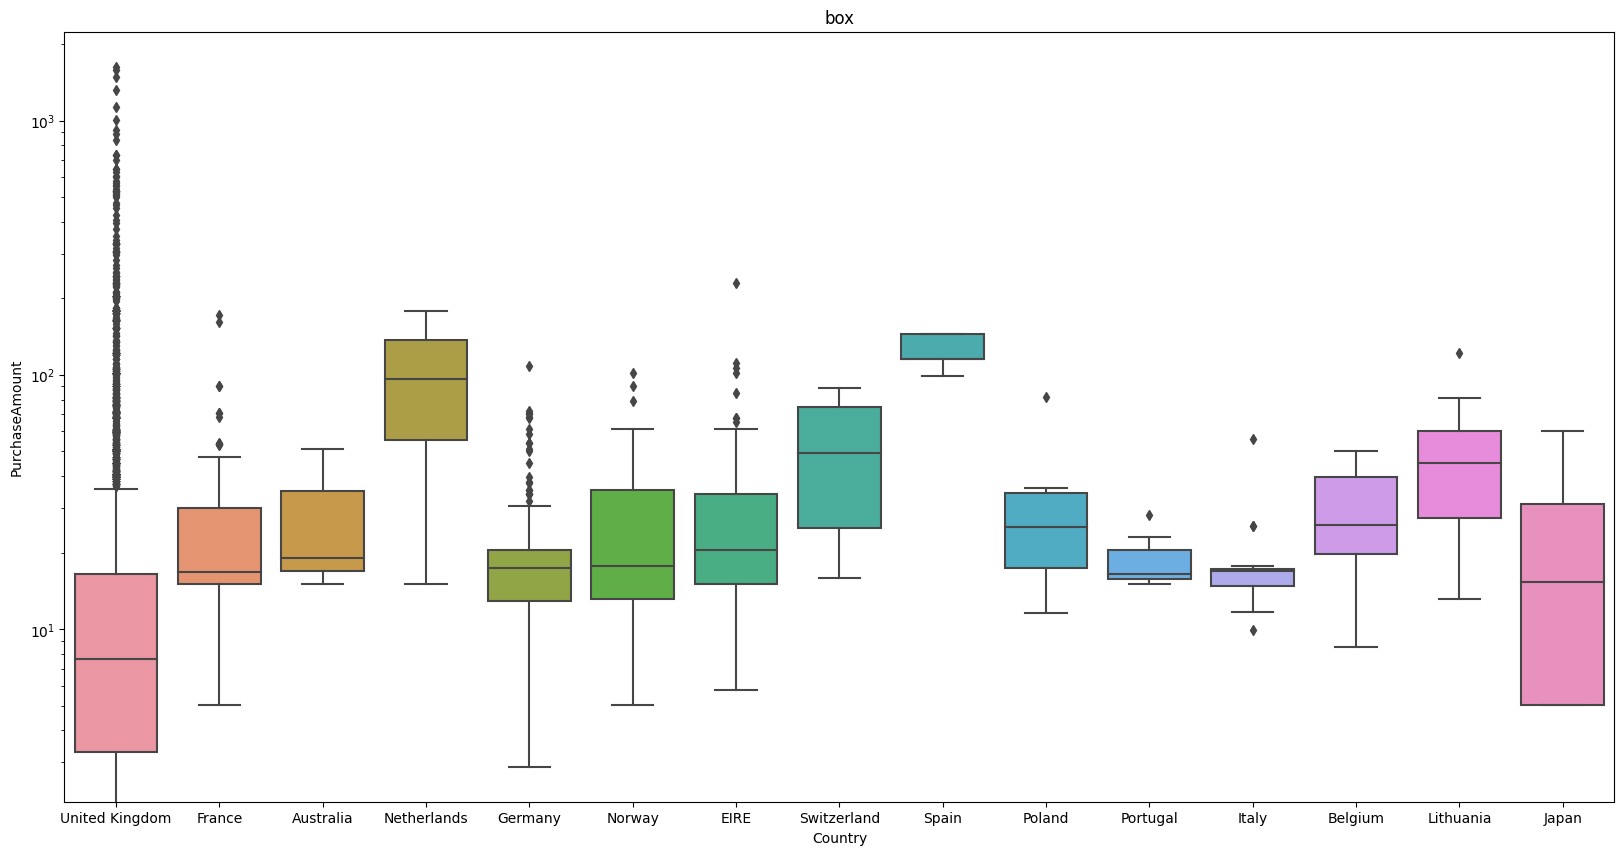

In [ ]:
# 箱ひげ図 ※y軸を対数に変換
# 国ごとをX軸、総購入金額をY軸に描写

# 描画プロット(fig)とサブプロット(ax)を生成
fig, ax = plt.subplots(figsize = (20, 10))   # グラフサイズを(20, 10)に変更した

ax = sns.boxplot(
    data = df_output_sample,
    x = 'Country',
    y = 'PurchaseAmount',
    )

plt.yscale('log')

# X軸にラベルを設定
ax.set_xlabel("Country")

# Y軸にラベルを設定
ax.set_ylabel("PurchaseAmount")

# タイトルを設定
ax.set_title("box")

# 箱ひげ図表示
plt.show()

# 課題１  
2011年1～6月の期間における、商品（StockCode, Description）ごとの合計売上金額を算出し、金額が高い順に順位をつける  


In [ ]:
# 1. 2011年1～6月の期間における、商品（StockCode, Description）ごとの合計売上金額を算出し、金額が高い順に順位をつけてください
# まず確認。データフレームは合計金額(PurchaseAmount)を追加したdf_outputを使用する
df_output.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchaseAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# 実験。StockCodeとDescriptionは一対一関係なのか？
df_output.loc[df_output.loc[:, "StockCode"] == "85096", :].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchaseAmount
10633,537237,85096,HILDA CANDY SPOT RABBIT,1,2010-12-06 09:58:00,7.62,NaN,United Kingdom,7.62
20940,538071,85096,HILDA CANDY SPOT RABBIT,1,2010-12-09 14:09:00,7.62,NaN,United Kingdom,7.62
24414,538349,85096,HILDA CANDY SPOT RABBIT,1,2010-12-10 14:59:00,7.62,NaN,United Kingdom,7.62
44072,540247,85096,HILDA CANDY SPOT RABBIT,3,2011-01-05 15:56:00,3.75,15464.0,United Kingdom,11.25
46709,540418,85096,HILDA CANDY SPOT RABBIT,1,2011-01-07 11:04:00,7.62,NaN,United Kingdom,7.62


## 【メモ】  
商品番号と商品は一対一になるはずだが、業務都合上時期によって変更されることもあるので、確認はしておいた方がよい。  
今回はどうやら同じものであり、よって上記のような商品名が欠落している場合は、埋めることが可能である。


In [ ]:
# 条件を満たすようにデータフレームを加工する
df_output_select = duckdb.query(
                   f"""
                   SELECT
                     StockCode,
                     Description,
                     SUM(PurchaseAmount) AS total                                        -- 合計売上金額
                   FROM
                     df_output
                   WHERE
                     InvoiceDate BETWEEN '2011-01-01 00:00:00' AND '2011-07-01 00:00:00' -- 購入日付をもとに条件を絞る
                                                                                         -- '2011-06-30'と書く方法もある。
                   GROUP BY
                     StockCode,
                     Description
                   """
                   ).to_df()
df_output_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StockCode    3724 non-null   object 
 1   Description  3507 non-null   object 
 2   total        3724 non-null   float64
dtypes: float64(1), object(2)
memory usage: 87.4+ KB


In [ ]:
df_output_select.isnull().sum()

StockCode        0
Description    217
total            0
dtype: int64

In [ ]:
df_output_select.head()

,StockCode,Description,total
0,22090,PAPER BUNTING RETROSPOT,14637.10
1,22754,SMALL RED BABUSHKA NOTEBOOK,572.96
2,22755,SMALL PURPLE BABUSHKA NOTEBOOK,572.03
3,22753,SMALL YELLOW BABUSHKA NOTEBOOK,284.86
4,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,3708.09


In [ ]:
# 今回はNaN行を削除する。
df_output_select = df_output_select.dropna()

# 出力して確認
df_output_select.head()

,StockCode,Description,total
0,22090,PAPER BUNTING RETROSPOT,14637.10
1,22754,SMALL RED BABUSHKA NOTEBOOK,572.96
2,22755,SMALL PURPLE BABUSHKA NOTEBOOK,572.03
3,22753,SMALL YELLOW BABUSHKA NOTEBOOK,284.86
4,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,3708.09


In [ ]:
# 加工したデータフレームを合計売上金額の高い順に並び変え、順位をつける。
df_output_select = df_output_select.sort_values(by = "total", ascending = False) # 降順でソート

df_output_select['rank'] = df_output_select['total'].rank(ascending = False)     # 降順で順位付け
df_output_select.head()

,StockCode,Description,total,rank
74,22423,REGENCY CAKESTAND 3 TIER,79386.40,1.0
1560,23166,MEDIUM CERAMIC TOP STORAGE JAR,78548.05,2.0
178,DOT,DOTCOM POSTAGE,65425.44,3.0
2038,47566,PARTY BUNTING,58246.57,4.0
2024,85123A,WHITE HANGING HEART T-LIGHT HOLDER,51876.24,5.0


# 課題２  

課題1で出した売り上げ金額が高い順に並べて、金額の累計が総売上金額の70%以下をAランク、70~90%以下をBランク、それ以降をCランクとしてラベルをつける。  
売り上げの70%が上位何%の商品数で占められているかを計算する。

In [ ]:
# 構成比(Composition ratio)を追加
df_output_select['Composition ratio'] = df_output_select['total'].div(df_output_select['total'].sum())
df_output_select.head()

,StockCode,Description,total,rank,Composition ratio
74,22423,REGENCY CAKESTAND 3 TIER,79386.40,1.0,0.019833
1560,23166,MEDIUM CERAMIC TOP STORAGE JAR,78548.05,2.0,0.019624
178,DOT,DOTCOM POSTAGE,65425.44,3.0,0.016345
2038,47566,PARTY BUNTING,58246.57,4.0,0.014552
2024,85123A,WHITE HANGING HEART T-LIGHT HOLDER,51876.24,5.0,0.012960


In [ ]:
# 累積構成比(Cumulative composition ratio)を追加
df_output_select['Cumulatibe composition ratio'] = df_output_select['Composition ratio'].cumsum()
df_output_select.head()

,StockCode,Description,total,rank,Composition ratio,Cumulatibe composition ratio
74,22423,REGENCY CAKESTAND 3 TIER,79386.40,1.0,0.019833,0.019833
1560,23166,MEDIUM CERAMIC TOP STORAGE JAR,78548.05,2.0,0.019624,0.039457
178,DOT,DOTCOM POSTAGE,65425.44,3.0,0.016345,0.055802
2038,47566,PARTY BUNTING,58246.57,4.0,0.014552,0.070354
2024,85123A,WHITE HANGING HEART T-LIGHT HOLDER,51876.24,5.0,0.012960,0.083314


In [ ]:
# for文を使ってランクをつける

# 空の列を用意する
df_output_select['rankABC'] = ' '

for i in range(len(df_output_select)):   # データフレーム(df_output_select)の行の長さを取得
    if float(df_output_select.iloc[i - 1, 5]) <= 0.7:
        df_output_select.iloc[i - 1, 6] = "A"
    elif float(df_output_select.iloc[i - 1, 5]) <= 0.9:
        df_output_select.iloc[i - 1, 6] = "B"
    else:
        df_output_select.iloc[i - 1, 6] = "C"

df_output_select.head()

,StockCode,Description,total,rank,Composition ratio,Cumulatibe composition ratio,rankABC
74,22423,REGENCY CAKESTAND 3 TIER,79386.40,1.0,0.019833,0.019833,A
1560,23166,MEDIUM CERAMIC TOP STORAGE JAR,78548.05,2.0,0.019624,0.039457,A
178,DOT,DOTCOM POSTAGE,65425.44,3.0,0.016345,0.055802,A
2038,47566,PARTY BUNTING,58246.57,4.0,0.014552,0.070354,A
2024,85123A,WHITE HANGING HEART T-LIGHT HOLDER,51876.24,5.0,0.012960,0.083314,A


In [ ]:
# 上のコードの改善案

d_list = []

for i, d in df_output_select.iterrows():                   # i:インデックス（行）, d:Series型の行データ
    if float(d['Cumulatibe composition ratio']) <= 0.7:    # 行を丸ごと取得しているので、列を指定する必要がある。
        d_list.append('A')
    elif float(d['Cumulatibe composition ratio']) <= 0.9:
        d_list.append('B')
    else:
        d_list.append('C')

df_output_select['rankABC'] = d_list

In [ ]:
# 売り上げの70%が上位何%の商品数で占められているかを計算する

# 要素それぞれの出現回数を得るのはvalue_counts()
df_output_select['rankABC'].value_counts()["A"] / len(df_output_select)

0.12660393498716851

# 課題3  
すべての期間において、顧客ごとの購入金額を算出し、金額が高い順に同じ人数になるように、10グループを作成する。

In [ ]:
df_output3 = duckdb.query(
             f"""
             WITH t AS(
               SELECT
                 CustomerID,
                 SUM(Quantity * UnitPrice) AS Total_of_Sales
               FROM
                 df
               WHERE
                 CAST(InvoiceDate AS DATE) BETWEEN DATETIME '2011-01-01' AND DATETIME '2011-06-30'
               GROUP BY
                 CustomerID
             )
             SELECT
               CustomerID,
               Total_of_Sales,
               NTILE(10) OVER(ORDER BY Total_of_Sales DESC) AS Sales_Decile  -- NTILE使用
             FROM
               t
             ORDER BY
               Total_of_Sales DESC
             """
             ).to_df()

df_output3.head()

,CustomerID,Total_of_Sales,Sales_Decile
0,NaN,475096.51,1
1,14646.0,127365.23,1
2,18102.0,78608.73,1
3,12415.0,73717.01,1
4,17450.0,57433.50,1


# 課題４  
すべての期間において、顧客ごとのRFM分析（R:最終購入日、F:購入回数、M:購入金額）を行う。

In [ ]:
# 基本統計情報を確認
df_output.describe()
# 四分位偏差をもとにRFMのスコアを今回は決める。

,Quantity,UnitPrice,CustomerID,PurchaseAmount
count,531283.000000,531283.000000,397924.000000,531283.000000
mean,10.655299,3.898954,15294.315171,20.077218
std,156.830617,35.876279,1713.169877,270.058254
min,1.000000,0.000000,12346.000000,0.000000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [ ]:
# 購入日の最新時刻を確認
df_output['InvoiceDate'].max()

'2011-12-09 12:50:00'

In [ ]:
# 基準日を設定。今回は購入最終時刻を参考に2011-01-01 00:00:00とする
# 値を別のデータ型に変換するときはCAST関数やCONVERT関数を用いる

# CustomerID列を使って、基準日から最終購入日までの日数（R）、購入回数（F）、購入金額（M）を算出する
df_EachCustomer_FRM = duckdb.query(
                      f"""
                      SELECT
                        CustomerID,
                        DATEDIFF(
                          'day',                                      -- 日数のみを表示
                          CAST(MAX(InvoiceDate) AS DATE),             -- 引かれる日時
                          CAST('2012/01/01 00:00:00' AS DATE)         -- 引く日時
                        ) AS Recentry,                                -- 基準日から最終購入日までの日数（R）
                        COUNT(DISTINCT InvoiceDate) AS Frequency,     -- 購入回数（F）購入日付を重複を排除してカウントした
                        SUM(PurchaseAmount) AS Monetary,              -- 購入金額（M）
                      FROM
                        df_output
                      GROUP BY
                        CustomerID
                      """
                      ).to_df()

# 確認用に出力
df_EachCustomer_FRM.head()

,CustomerID,Recentry,Frequency,Monetary
0,16427.0,286,2,241.06
1,14056.0,24,23,8214.65
2,15656.0,68,4,748.50
3,16518.0,84,2,484.32
4,14740.0,220,3,1448.21


In [ ]:
# 各列の四分位数を確認
df_EachCustomer_FRM.describe()

,CustomerID,Recentry,Frequency,Monetary
count,4339.000000,4340.000000,4340.000000,4.340000e+03
mean,15299.936852,115.020276,4.697005,2.457761e+03
std,1721.889758,100.005992,30.375717,2.808944e+04
min,12346.000000,23.000000,1.000000,0.000000e+00
25%,13812.500000,40.000000,1.000000,3.073225e+02
50%,15299.000000,73.000000,2.000000,6.744850e+02
75%,16778.500000,164.250000,5.000000,1.661950e+03
max,18287.000000,396.000000,1941.000000,1.755277e+06


In [ ]:
# for文を使ってR, F, Mそれぞれのスコアを算出する。

# Rのスコア用の列を用意する
df_EachCustomer_FRM['R_score'] = ' '

for i in range(len(df_EachCustomer_FRM)):                       # データフレームの行の長さを取得
    if float(df_EachCustomer_FRM.iloc[i - 1, 1]) <= 40:         # 第1四分位数
        df_EachCustomer_FRM.iloc[i - 1, 4] = 1
    elif float(df_EachCustomer_FRM.iloc[i - 1, 1]) <= 73:       # 第2四分位数
        df_EachCustomer_FRM.iloc[i - 1, 4] = 2
    elif float(df_EachCustomer_FRM.iloc[i - 1, 1]) <= 164:      # 第3四分位数
        df_EachCustomer_FRM.iloc[i - 1, 4] = 3
    else:
        df_EachCustomer_FRM.iloc[i - 1, 4] = 4

# Fのスコア用の列を用意する
df_EachCustomer_FRM['F_score'] = ' '

for i in range(len(df_EachCustomer_FRM)):                       # データフレームの行の長さを取得
    if float(df_EachCustomer_FRM.iloc[i - 1, 2]) <= 1:          # 第1四分位数
        df_EachCustomer_FRM.iloc[i - 1, 5] = 1
    elif float(df_EachCustomer_FRM.iloc[i - 1, 2]) <= 2:        # 第2四分位数
        df_EachCustomer_FRM.iloc[i - 1, 5] = 2
    elif float(df_EachCustomer_FRM.iloc[i - 1, 2]) <= 5:        # 第3四分位数
        df_EachCustomer_FRM.iloc[i - 1, 5] = 3
    else:
        df_EachCustomer_FRM.iloc[i - 1, 5] = 4

# Mのスコア用の列を用意する
df_EachCustomer_FRM['M_score'] = ' '

for i in range(len(df_EachCustomer_FRM)):                       # データフレームの行の長さを取得
    if float(df_EachCustomer_FRM.iloc[i - 1, 3]) <= 307:        # 第1四分位数
        df_EachCustomer_FRM.iloc[i - 1, 6] = 1
    elif float(df_EachCustomer_FRM.iloc[i - 1, 3]) <= 674:      # 第2四分位数
        df_EachCustomer_FRM.iloc[i - 1, 6] = 2
    elif float(df_EachCustomer_FRM.iloc[i - 1, 3]) <= 1755277:  # 第3四分位数
        df_EachCustomer_FRM.iloc[i - 1, 6] = 3
    else:
        df_EachCustomer_FRM.iloc[i - 1, 6] = 4

# 3種類の値の合計値を算出する
df_EachCustomer_FRM['RFM_total'] = df_EachCustomer_FRM['R_score'] + df_EachCustomer_FRM['F_score'] + df_EachCustomer_FRM['M_score']

# 確認として出力
df_EachCustomer_FRM.sort_values('RFM_total', ascending = False).head()

,CustomerID,Recentry,Frequency,Monetary,R_score,F_score,M_score,RFM_total
2355,18260.0,195,6,2643.20,4,4,3,11
669,12947.0,166,6,1603.99,4,4,3,11
2284,15379.0,192,7,3703.29,4,4,3,11
2163,12980.0,180,9,7374.90,4,4,3,11
2281,13093.0,298,8,7832.47,4,4,3,11


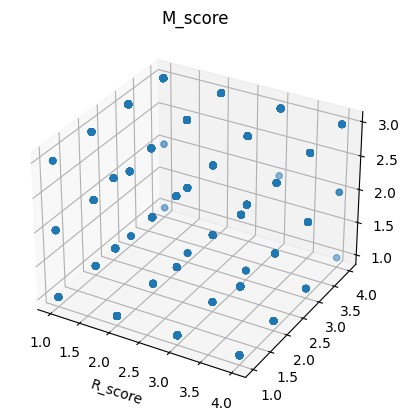

In [ ]:
# 3次元の散布図を描画してみる
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')

# 散布図を作成
ax.scatter(df_EachCustomer_FRM['R_score'],
           df_EachCustomer_FRM['F_score'],
           df_EachCustomer_FRM['M_score'],
           )

# タイトル
ax.set_title('RFM分析')

# x軸ラベル
ax.set_xlabel('R_score')

# y軸ラベル
ax.set_title('F_score')

# z軸ラベル
ax.set_title('M_score')

plt.show()

# 課題５  
すべての機関において、国ごとの総売り上げを月の順番で並べる

In [ ]:
# datetime型に変換
df_output['InvoiceDate'] = pd.to_datetime(df_output['InvoiceDate'])

# 年月データのみを取得
df_output['InvoiceDate_month'] = df_output['InvoiceDate'].dt.strftime('%Y-%m')

# 確認
df_output.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchaseAmount,InvoiceDate_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [ ]:
# 国ごとに月別の総売り上げを表示
df_output.groupby(['Country', 'InvoiceDate_month']).sum()['PurchaseAmount']

<ipython-input-119-25632674efcd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_output.groupby(['Country', 'InvoiceDate_month']).sum()['PurchaseAmount']


Country      InvoiceDate_month
Australia    2010-12               1032.85
             2011-01               9017.71
             2011-02              14695.42
             2011-03              17223.99
             2011-04                771.60
                                    ...   
Unspecified  2011-06                185.78
             2011-07               1425.41
             2011-08                531.03
             2011-09                286.85
             2011-11                965.75
Name: PurchaseAmount, Length: 302, dtype: float64

# 課題６  
2011年1～6月の期間における、購入者が500人以上の商品のうち、最もファンが多い順に並べる

In [ ]:
# FROM句に加工したグループをネストする
df_Repeat = duckdb.query(
            f"""
            SELECT
              CountCustomer_TABLE.StockCode,
              COUNT(CountRepeat) AS Repeat
            FROM(
              SELECT
                StockCode,                                   -- 外側の処理で扱いたいのでSELECTしておく
                COUNT(CustomerID) AS CountRepeat             -- 顧客の購入回数を表示
              FROM
                df_output                                    -- df_outputから
              WHERE
                InvoiceDate BETWEEN '2011-01-01 00:00:00'    -- 購入日付をもとに条件を絞る
                                AND '2011-07-01 00:00:00'
              GROUP BY
                StockCode,                                   -- 商品ごとに
                CustomerID                                   -- 客をまとめる
              HAVING
                COUNT(CustomerID) >= 2                       -- ２回以上買っている顧客のみ
            ) AS CountCustomer_TABLE                         -- 加工した表を「CountCustomer_TABLE」とする
            GROUP BY
              CountCustomer_TABLE.StockCode
            ORDER BY
              CountCustomer_TABLE.StockCode
            """
            ).to_df()
df_Repeat

,StockCode,Repeat
0,10002,3
1,10120,1
2,10125,3
3,10133,7
4,10135,3
...,...,...
2052,90214P,1
2053,90214R,1
2054,C2,4
2055,M,12


In [ ]:
# 累計新規顧客数を出す
df_TotalRepeat = duckdb.query(
                 f"""
                 SELECT
                   CountCustomer2_TABLE.StockCode,
                   COUNT(TotalCountRepeat) AS TotalRepeat
                 FROM(
                   SELECT
                     StockCode,                               -- 外側の処理で扱いたいのでSELECTしておく
                     COUNT(CustomerID) AS TotalCountRepeat    -- 顧客の購入回数を表示
                   FROM
                     df_output
                   GROUP BY
                     StockCode,                               -- 商品ごとに
                     CustomerID                               -- 客をまとめる
                   HAVING
                     COUNT(CustomerID) >= 2                   -- ２回以上買っている顧客のみ
                 ) AS CountCustomer2_TABLE                    -- 加工した表を「CountCustomer2_TABLE」とする
                 GROUP BY
                   CountCustomer2_TABLE.StockCode
                 ORDER BY
                   CountCustomer2_TABLE.StockCode
                 """
                 ).to_df()
df_TotalRepeat

,StockCode,TotalRepeat
0,10002,6
1,10080,2
2,10120,3
3,10125,9
4,10133,18
...,...,...
2969,BANK CHARGES,2
2970,C2,9
2971,DOT,1
2972,M,40


In [ ]:
# ネスト構造を改善した例（WITH句の使用）
# 累計新規顧客数を出す
df_TotalRepeat = duckdb.query(
                 f"""
                 WITH t AS (
                   SELECT
                     StockCode,                               -- 外側の処理で扱いたいのでSELECTしておく
                     COUNT(CustomerID) AS TotalCountRepeat    -- 顧客の購入回数を表示
                   FROM
                     df_output
                   GROUP BY
                     StockCode,                               -- 商品ごとに
                     CustomerID                               -- 客をまとめる
                   HAVING
                     COUNT(CustomerID) >= 2                   -- ２回以上買っている顧客のみ
                 )

                 SELECT
                   CountCustomer2_TABLE.StockCode,
                   COUNT(TotalCountRepeat) AS TotalRepeat
                 FROM
                   t AS CountCustomer2_TABLE                  -- 加工した表を「CountCustomer2_TABLE」とする
                 GROUP BY
                   CountCustomer2_TABLE.StockCode
                 ORDER BY
                   CountCustomer2_TABLE.StockCode
                 """
                 ).to_df()
df_TotalRepeat

,StockCode,TotalRepeat
0,10002,6
1,10080,2
2,10120,3
3,10125,9
4,10133,18
...,...,...
2969,BANK CHARGES,2
2970,C2,9
2971,DOT,1
2972,M,40


In [ ]:
# 参考(２つのSQLを一つにまとめている例)

df_output2 = duckdb.query(
    f"""
    WITH
    -- 商品ごとの購入者
    t_purchaser AS(
      SELECT
        StockCode,
        COUNT(DISTINCT CustomerID) AS Num_of_Purchaser    -- 顧客数（重複なし）を「Num_of_Purchaser」とする
      FROM
        df
      GROUP BY
        StockCode
    ),

    -- 商品コードごとの複数回購入者
    t_repeat AS(
      SELECT
        StockCode,
        COUNT(DISTINCT CustomerID) AS Num_of_Repeater    -- ２回以上購入した顧客数（重複なし）を「Num_of_Repeater」とする
      FROM (
        SELECT
          CustomerID,
          StockCode,
          COUNT(*) AS Num_of_Purchase
        FROM
          df
        GROUP BY
          CustomerID,
          StockCode
        HAVING
          Num_of_Purchase >= 2
      )
      GROUP BY
        StockCode
    )

    SELECT
      StockCode,
      Num_of_Purchaser,
      Num_of_Repeater,
      Num_of_Repeater / Num_of_Purchaser AS Percentage_of_Repeat
    FROM
      t_purchaser
      LEFT OUTER JOIN t_repeat
        USING(StockCode)
    ORDER BY
      Num_of_Purchaser desc
    """
).to_df()

df_output2

,StockCode,Num_of_Purchaser,Num_of_Repeater,Percentage_of_Repeat
0,22423,887,367.0,0.413754
1,85123A,858,433.0,0.504662
2,47566,708,290.0,0.409605
3,84879,679,308.0,0.453608
4,22720,640,252.0,0.393750
...,...,...,...,...
4065,23628,0,NaN,NaN
4066,46776a,0,NaN,NaN
4067,84031b,0,NaN,NaN
4068,79323S,0,NaN,NaN


In [ ]:
# ２つの表を結合する
df_Join = duckdb.query(
          f"""
          SELECT
            df_Repeat.StockCode,
            df_Repeat.Repeat,
            df_TotalRepeat.TotalRepeat,
            CAST(df_Repeat.Repeat AS FLOAT) / df_TotalRepeat.TotalRepeat *100 AS RepeatRate -- 割られる数を浮動小数点にキャストする
          FROM
            df_Repeat
            INNER JOIN df_TotalRepeat
              ON df_Repeat.StockCode = df_TotalRepeat.StockCode
          ORDER BY
            Repeat DESC,                                                                    -- ここ半年間に２回以上購入した顧客が多い商品のうち
            RepeatRate DESC                                                                 -- リピート率の高い商品を上位に並べる
          """
          ).to_df()

# リピート率完成
df_Join

,StockCode,Repeat,TotalRepeat,RepeatRate
0,85123A,207,424,48.820755
1,22423,164,334,49.101795
2,47566,159,288,55.208332
3,85099B,133,314,42.356689
4,20725,131,279,46.953403
...,...,...,...,...
2052,84029G,1,59,1.694915
2053,23198,1,60,1.666667
2054,22909,1,81,1.234568
2055,22865,1,125,0.800000


# 課題7
2011年における、購買の売上分解ツリー（売上のロジックツリー）を作成する  

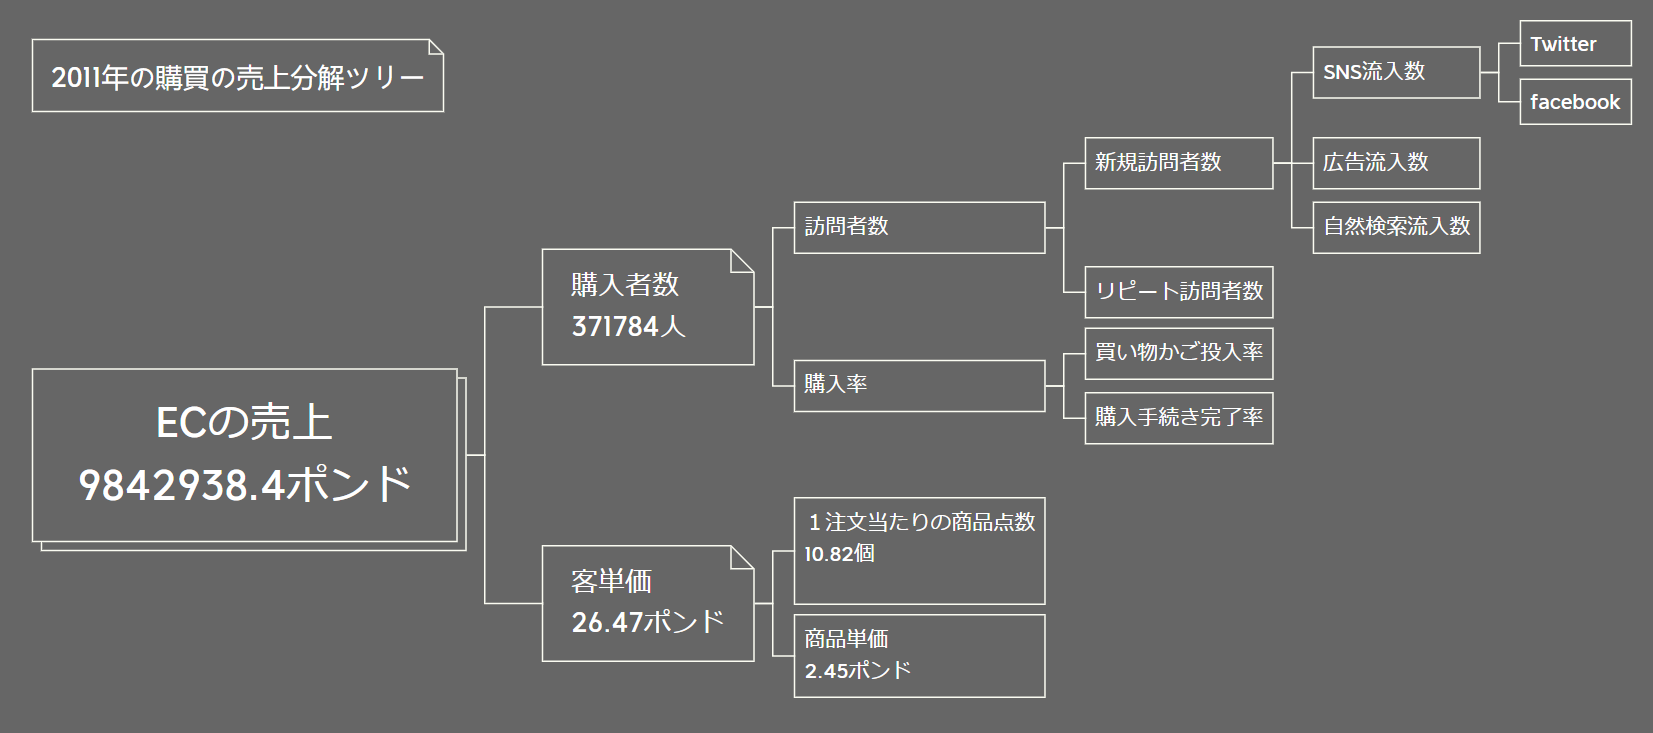

In [ ]:
# 2011年のデータを抽出
df_2011 = duckdb.query(
          f"""
          SELECT
            *
          FROM
            df_output
          WHERE
            InvoiceDate BETWEEN DATETIME '2011-01-01' AND DATETIME '2012-01-01'
          """
          ).to_df()

df_2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PurchaseAmount,InvoiceDate_month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011-01
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011-01
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011-01
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011-01


In [ ]:
# ECの売上
#df_2011['PurchaseAmount'].sum()

# 購入者数
#df_2011.describe()

# 客単価
#df_2011['PurchaseAmount'].sum() / df_2011['CustomerID'].count()

# 購入商品数
#df_2011['Quantity'].sum()

# 1注文当たりの商品点数
#df_2011['Quantity'].mean()

# 商品単価
(df_2011['PurchaseAmount'].sum() / df_2011['CustomerID'].count()) / df_2011['Quantity'].mean()

2.446428600669584

# 課題8  
2011年1～6月の期間において、バスケット分析を行う。

In [ ]:
df_AssociationRules = duckdb.query(
                      f"""
                      WITH
                      -- 総来店者数
                      t_all AS(
                        SELECT
                          COUNT(DISTINCT CustomerID) AS Num_of_ALL
                        FROM
                          df
                        WHERE
                          InvoiceDate BETWEEN DATETIME '2011-01-01' AND DATETIME '2011-07-01'
                      ),

                      -- 商品ごとの購入者数
                      t_purchaser AS(
                        SELECT
                          StockCode,
                          COUNT(DISTINCT CustomerID) AS Num_of_Purchaser                         -- StockCodeごとに購入者数を出す。
                        FROM
                          df
                        WHERE
                          InvoiceDate BETWEEN DATETIME '2011-01-01' AND DATETIME '2011-07-01'
                        GROUP BY
                          StockCode
                      ),

                      -- 商品ごとの同時購入者pre
                      -- (下記のt_simul_purchaserで集計するために、StockCode・CustomerID・InvoiceDateで一覧化する)
                      t_simul_purchaser_pre AS(                                                  -- simul:simultaneous(同時)の略。
                        SELECT DISTINCT
                         StockCode,
                         CustomerID,
                         InvoiceDate                                                             --（同じ日付で買っていると、同時購入とみなす）
                        FROM
                          df
                        WHERE
                          InvoiceDate BETWEEN DATETIME '2011-01-01' AND DATETIME '2011-07-01'
                      ),

                      -- 商品ごとの同時購入者数
                      t_simul_purchaser AS(
                        SELECT
                          t1.StockCode AS StockCode_A,                                           -- のちの結合に必要
                          t2.StockCode AS StockCode_B,                                           -- のちの結合に必要
                          COUNT(t2.StockCode) AS Num_of_Simul_Purchaser                          -- AとBの同時購入者数
                        FROM
                          t_simul_purchaser_pre AS t1
                          INNER JOIN t_simul_purchaser_pre AS t2                                 -- ※同じテーブルをJOINすることで、StockCodeA, Bとして両方の同時購入の組み合わせを出す
                            USING(
                              InvoiceDate,                                                       -- 同日に
                              CustomerID                                                         -- 同じ人が購入している商品で
                            )
                        WHERE
                          t1.StockCode != t2.StockCode                                           -- 商品番号が異なるものだけを選ぶ
                        GROUP BY
                          t1.StockCode,
                          t2.StockCode
                      )

                      SELECT
                        t_simul_purchaser.StockCode_A,
                        t_purchaser.Num_of_Purchaser AS Num_of_Purchaser_A,                      -- 商品Aの購入者(t_purchaserで算出済み)
                        Num_of_Purchaser_A / t_all.Num_of_all AS Purchase_rate_of_A,             -- 商品Aの購入者÷全体の購入者で、商品Aの購入率を出す
                        t_simul_purchaser.StockCode_B,
                        t2.Num_of_Purchaser AS Num_of_Purchaser_B,                               -- 商品Bの購入者（t_purchaserで算出済み）
                        Num_of_Purchaser_B / t_all.Num_of_all AS Purchase_rate_of_B,             -- 商品Bの購入者÷全体の購入者で、商品Bの購入率を出す。
                        Num_of_Simul_Purchaser,                                                  -- 商品Aと商品Bの同時購入者(t_simul_purchaserで算出済み)
                        Num_of_Simul_Purchaser / t_all.Num_of_all AS Support_of_A_and_B,         -- 全データの中で商品Aと商品Bを同時に購入した割合(支持度(Suport))
                        Num_of_Simul_Purchaser / Num_of_Purchaser_A AS Confidence_of_B_for_A,    -- 商品AとBの同時購入者÷商品Aの購入者で、商品A購入者に対する商品Bの同時購入率を出す(信頼度(Confidence))
                        Confidence_of_B_for_A / Num_of_Purchaser_B AS Lift                       -- 商品A購入者に対する商品Bの同時購入率÷商品Bの購入率(両者上で算出)によってリフト値を出す。

                      FROM
                        t_purchaser                                                              -- 商品ごとの購入者数
                        LEFT OUTER JOIN t_simul_purchaser                                        -- t_simul_purchaserを結合
                          ON t_purchaser.StockCode = t_simul_purchaser.StockCode_A               -- 左の表について、結合条件を満たしていないデータも含めてすべてのデータを表示する。

                        LEFT OUTER JOIN t_purchaser AS t2                                        -- 商品ごとの購入者数(同じ表なので区別するためにt2と命名)
                          ON t_simul_purchaser.StockCode_B = t2.StockCode

                        FULL OUTER JOIN t_all
                          ON True
                      ORDER BY
                        Support_of_A_and_B,
                        Confidence_of_B_for_A,
                        Lift

                      """
                      ).to_df()

# 出力して確認
df_AssociationRules.head()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,StockCode_A,Num_of_Purchaser_A,Purchase_rate_of_A,StockCode_B,Num_of_Purchaser_B,Purchase_rate_of_B,Num_of_Simul_Purchaser,Support_of_A_and_B,Confidence_of_B_for_A,Lift
0,85123A,562,0.204215,23190,54.0,0.019622,1.0,0.000363,0.001779,0.000033
1,85123A,562,0.204215,22544,37.0,0.013445,1.0,0.000363,0.001779,0.000048
2,85123A,562,0.204215,21883,36.0,0.013081,1.0,0.000363,0.001779,0.000049
3,85123A,562,0.204215,23280,33.0,0.011991,1.0,0.000363,0.001779,0.000054
4,85123A,562,0.204215,22215,32.0,0.011628,1.0,0.000363,0.001779,0.000056
